In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np

blob_centers = np.array([[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8],
                         [-2.8,  2.8], [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,
                  random_state=7)

k = 5
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
y_pred = kmeans.fit_predict(X)

In [2]:
y_pred

array([0, 0, 4, ..., 3, 1, 0], shape=(2000,), dtype=int32)

In [3]:
y_pred is kmeans.labels_

True

In [4]:
kmeans.labels_


array([0, 0, 4, ..., 3, 1, 0], shape=(2000,), dtype=int32)

In [5]:
kmeans.cluster_centers_

array([[-2.80214068,  1.55162671],
       [ 0.08703534,  2.58438091],
       [-1.46869323,  2.28214236],
       [-2.79290307,  2.79641063],
       [ 0.31332823,  1.96822352]])

In [6]:
import numpy as np
X_new = np.array([[0,2],[3,2],[-3,3],[-3,2.5]])
kmeans.predict(X_new)

array([4, 4, 3, 3], dtype=int32)

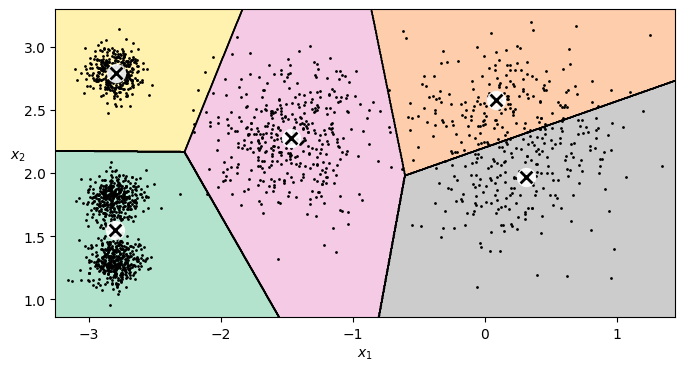

In [7]:
# extra code – this cell generates and saves Figure 9–3
import matplotlib.pyplot as plt
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

In [8]:
kmeans.transform(X_new).round(2)

array([[2.84, 0.59, 1.5 , 2.9 , 0.31],
       [5.82, 2.97, 4.48, 5.85, 2.69],
       [1.46, 3.11, 1.69, 0.29, 3.47],
       [0.97, 3.09, 1.55, 0.36, 3.36]])

In [9]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5,init=good_init,n_init=1,random_state=42)
kmeans.fit(X)

,n_clusters,5
,init,"array([[-3, ... [ 0, 2]])"
,n_init,1
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [10]:
kmeans.inertia_

211.59853725816836

In [11]:
kmeans.score(X)

-211.59853725816836

In [12]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5,random_state=42)
minibatch_kmeans.fit(X)

,n_clusters,5
,init,'k-means++'
,max_iter,100
,batch_size,1024
,verbose,0
,compute_labels,True
,random_state,42
,tol,0.0
,max_no_improvement,10
,init_size,None
,n_init,'auto'


In [13]:
from sklearn.metrics import silhouette_score
silhouette_score(X,kmeans.labels_)


0.655517642572828

In [14]:
import urllib.request
from pathlib import Path

IMAGES_PATH = Path() / "images" / "unsupervised_learning"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

homl3_root = "https://github.com/ageron/handson-ml3/raw/main/"
filename = "ladybug.png"
filepath = IMAGES_PATH / filename
if not filepath.is_file():
    print(f"Downloading {filename}")
    url = f"{homl3_root}/images/unsupervised_learning/{filename}"
    urllib.request.urlretrieve(url,filepath)

In [15]:
import PIL
image = np.asarray(PIL.Image.open(filepath))
image.shape

(533, 800, 3)

In [16]:
image

array([[[ 25,  29,   2],
        [ 24,  28,   1],
        [ 24,  29,   0],
        ...,
        [ 57, 105,  21],
        [ 56, 103,  22],
        [ 52,  99,  19]],

       [[ 24,  28,   1],
        [ 23,  27,   0],
        [ 23,  27,   0],
        ...,
        [ 60, 108,  22],
        [ 59, 106,  25],
        [ 55, 102,  22]],

       [[ 23,  27,   2],
        [ 22,  26,   1],
        [ 22,  26,   0],
        ...,
        [ 66, 114,  28],
        [ 63, 111,  27],
        [ 58, 105,  24]],

       ...,

       [[ 14,  18,   1],
        [ 14,  18,   1],
        [ 13,  20,   2],
        ...,
        [ 13,  61,   3],
        [  9,  56,   2],
        [  5,  51,   2]],

       [[ 14,  18,   1],
        [ 14,  18,   1],
        [ 12,  19,   1],
        ...,
        [ 11,  59,   1],
        [  7,  54,   0],
        [  3,  49,   0]],

       [[ 13,  17,   0],
        [ 13,  17,   0],
        [ 11,  18,   0],
        ...,
        [ 10,  58,   0],
        [  5,  52,   0],
        [  2,  48,   0]]

In [17]:
X = image.reshape(-1,3)
kmeans = KMeans(n_clusters=8,random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

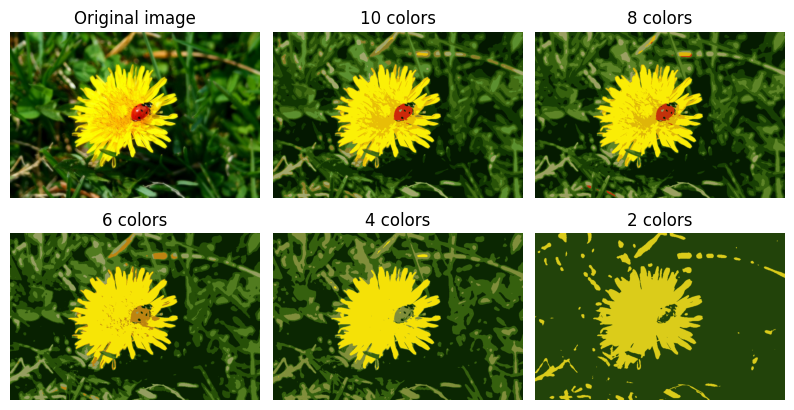

In [18]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

plt.figure(figsize=(10, 5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(2, 3, 1)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(2, 3, 2 + idx)
    plt.imshow(segmented_imgs[idx] / 255)
    plt.title(f"{n_clusters} colors")
    plt.axis('off')

plt.show()

In [20]:
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)
X_train, y_train = X_digits[:1400],y_digits[:1400]
X_test, y_test = X_digits[1400:],y_digits[1400:]


In [21]:
from sklearn.linear_model import LogisticRegression

n_labeled = 50
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train[:n_labeled],y_train[:n_labeled])

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,10000
,multi_class,'deprecated'


In [22]:
log_reg.score(X_test,y_test)

0.7581863979848866

In [52]:
k = 50
kmeans = KMeans(n_clusters=k,random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist,axis=0)
X_representative_digits = X_train[representative_digit_idx]

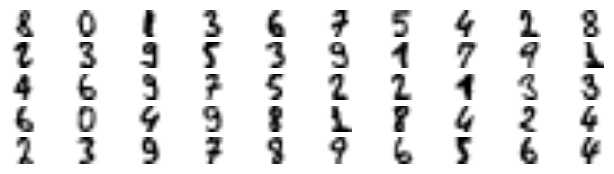

In [25]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary",
               interpolation="bilinear")
    plt.axis('off')

plt.show()

In [54]:
y_representative_digits = np.array([
     8,0,1,3,6,7,5,4,2,8,
     2,3,9,5,3,9,1,7,9,1,
     4,6,9,7,5,2,2,1,3,3, 
     6,0,4,9,8,1,8,4,2,4, 
     2,3,9,7,8,9,6,5,6,4
])

In [55]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.8337531486146096

In [56]:
y_train_propagated = np.empty(len(X_train),dtype=np.int64)
for i in range(k):
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

In [59]:
log_reg = LogisticRegression(max_iter=10_000,random_state=42)
log_reg.fit(X_train,y_train_propagated)
log_reg.score(X_test,y_test)

0.8690176322418136

In [63]:
precentile_closest = 99

X_cluster_dist = X_digits_dist[np.arange(len(X_train)),kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist,precentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train[partially_propagated]

In [66]:
log_reg = LogisticRegression(max_iter=10_000,random_state=42)
log_reg.fit(X_train_partially_propagated,y_train_partially_propagated)
log_reg.score(X_test,y_test)

0.9118387909319899

In [67]:
(y_train_partially_propagated == y_train[partially_propagated]).mean()

np.float64(1.0)

In [68]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=1000,noise=0.05)
dbscan = DBSCAN(eps=0.05,min_samples=5)
dbscan.fit(X)

,eps,0.05
,min_samples,5
,metric,'euclidean'
,metric_params,None
,algorithm,'auto'
,leaf_size,30
,p,None
,n_jobs,None


In [69]:
dbscan.labels_

array([ 0,  0, -1,  0,  1,  2,  0,  2,  2,  4,  0,  3,  4,  0,  2,  0,  1,
        1,  3,  0,  0,  2, -1, -1,  0, -1,  0,  1,  0,  2,  0,  4,  2,  0,
        4,  1,  1,  0,  2,  0,  0,  2,  0,  0, -1,  0,  2,  4,  0,  0,  4,
        0,  0,  4,  4,  0,  0,  0,  5,  2,  1, -1,  4,  0,  1,  0,  0,  2,
        2,  2,  0,  2,  2,  0,  0,  4, -1,  0,  4,  0,  0,  0,  0,  3,  2,
       -1,  1,  2,  1,  4,  0,  4,  0,  0,  0,  0,  4,  4,  0,  0, -1,  2,
        0,  0,  4,  0,  0,  0,  2,  3,  0,  2,  1, -1,  0,  0,  0,  2,  0,
        2,  2,  0,  2, -1,  2,  0,  4,  0,  4,  0,  0,  0,  0,  0,  2,  2,
        1,  0,  0,  0,  0, -1,  4,  4,  4,  0,  0,  0,  2,  4,  0,  0,  4,
        0,  0,  0,  4,  3,  0, -1, -1,  2,  4,  2,  2,  1,  4,  0,  0,  0,
        2,  0, -1,  0,  0,  0,  3,  0,  0,  2,  2,  0,  1,  2,  0,  4, -1,
        0,  0,  0,  3,  3,  0,  0,  4,  0,  0, -1,  4,  1,  4,  0,  2,  2,
        1,  0,  0,  5,  0,  2,  0,  2,  3,  2,  2,  4, -1,  2,  3,  4,  0,
        4,  0, -1,  0,  0

In [70]:
dbscan.core_sample_indices_

array([  1,   3,   4,   5,   7,  11,  13,  15,  16,  17,  18,  19,  20,
        21,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  43,  45,  46,  47,  48,  49,  50,  52,  53,  54,  55,
        56,  57,  59,  60,  62,  63,  64,  65,  66,  67,  68,  69,  70,
        71,  72,  73,  74,  75,  77,  78,  79,  81,  82,  83,  84,  86,
        87,  88,  89,  90,  91,  93,  94,  95,  96,  97,  98,  99, 101,
       102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 114, 116,
       117, 118, 119, 120, 121, 122, 124, 125, 126, 127, 128, 129, 130,
       132, 133, 134, 135, 136, 137, 138, 139, 140, 142, 143, 144, 145,
       146, 147, 148, 149, 150, 151, 152, 154, 156, 157, 161, 162, 163,
       164, 165, 169, 170, 171, 173, 174, 175, 176, 177, 178, 179, 180,
       181, 182, 184, 185, 187, 188, 189, 190, 191, 192, 193, 194, 195,
       196, 198, 199, 200, 203, 204, 205, 206, 208, 209, 210, 211, 212,
       213, 214, 217, 218, 219, 220, 221, 222, 224, 225, 226, 22

In [71]:
dbscan.components_

array([[-0.32335292,  0.91478638],
       [-0.85675566,  0.41012342],
       [ 0.79375621, -0.48294526],
       ...,
       [ 0.27763022,  0.8954358 ],
       [-1.0408889 ,  0.29103492],
       [ 0.85813112,  0.54404518]], shape=(791, 2))

In [78]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

,n_neighbors,50
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [79]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([0, 4, 0, 2])

In [80]:
knn.predict_proba(X_new)

array([[0.94, 0.  , 0.  , 0.  , 0.06, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.98, 0.02],
       [0.72, 0.28, 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  ]])

In [81]:
y_dist,y_pred_idx = knn.kneighbors(X_new,n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  4,  0, -1])

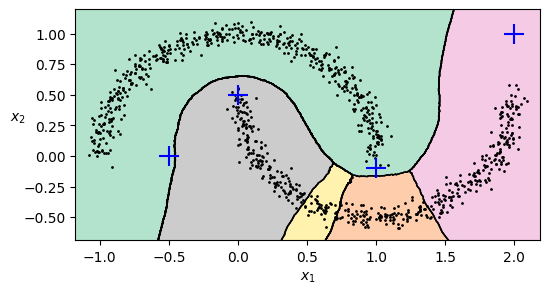

In [82]:
plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)
plt.show()

In [88]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [89]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3,n_init=10)
gm.fit(X)

,n_components,3
,covariance_type,'full'
,tol,0.001
,reg_covar,1e-06
,max_iter,100
,n_init,10
,init_params,'kmeans'
,weights_init,None
,means_init,None
,precisions_init,None
,random_state,None


In [93]:
gm.weights_

array([0.3902064 , 0.40008431, 0.20970929])

In [92]:
gm.covariances_

array([[[ 0.68780591,  0.79597839],
        [ 0.79597839,  1.21232694]],

       [[ 0.63480459,  0.72971575],
        [ 0.72971575,  1.16110086]],

       [[ 1.14901133, -0.03241901],
        [-0.03241901,  0.95484861]]])

In [94]:
gm.converged_

True

In [95]:
gm.n_iter_

4

In [96]:
gm.predict(X)

array([0, 0, 1, ..., 2, 2, 2], shape=(1250,))

In [97]:
gm.predict_proba(X).round(3)

array([[0.977, 0.   , 0.023],
       [0.983, 0.001, 0.017],
       [0.   , 1.   , 0.   ],
       ...,
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ]], shape=(1250, 3))

In [98]:
X_new,y_new = gm.sample(6)
X_new

array([[ 0.23350298, -0.16112034],
       [-1.50134318,  1.42955608],
       [-1.91302415,  1.0918715 ],
       [-1.48162146,  1.29393343],
       [ 3.72060816,  1.2361111 ],
       [ 4.02467251,  0.04807348]])

In [99]:
y_new

array([0, 1, 1, 1, 2, 2])

In [101]:
gm.score_samples(X).round(2)

array([-2.61, -3.57, -3.33, ..., -3.51, -4.4 , -3.81], shape=(1250,))